# United States Income: Divided Along Demographics¶


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('adult.csv')

In [3]:
def income_chart(data,title):
    plt.pie(data.income.value_counts(normalize=True),
            labels=data.income.value_counts(normalize=True).index
           , autopct='%1.1f%%',
           colors=['skyblue','pink'])
    plt.title(title)

# How do Demographics Affect Income

While the findings aren't necessarily surprising, it is sometimes useful to get a reminder just how largely income is divided along demographic lines.

Note: This data is from the 1994 Census and divides income into two bins: <=50K or >50K. Based on a quick calculation, \$50,000 in 1994 is equal to about \\$87,000 in 2020.

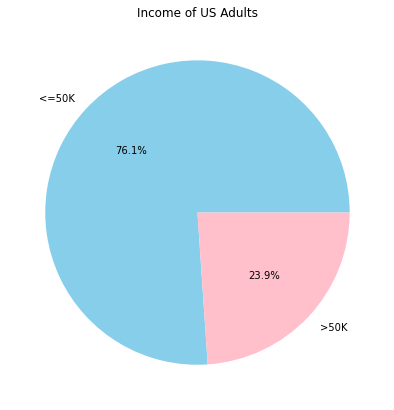

In [4]:
plt.figure(figsize=(7,7))
income_chart(data,'Income of US Adults')

This is the distribution of incomes of the general population. Nothing too surprising here, let's see how much better your chances of making over 50k a year when you are white.

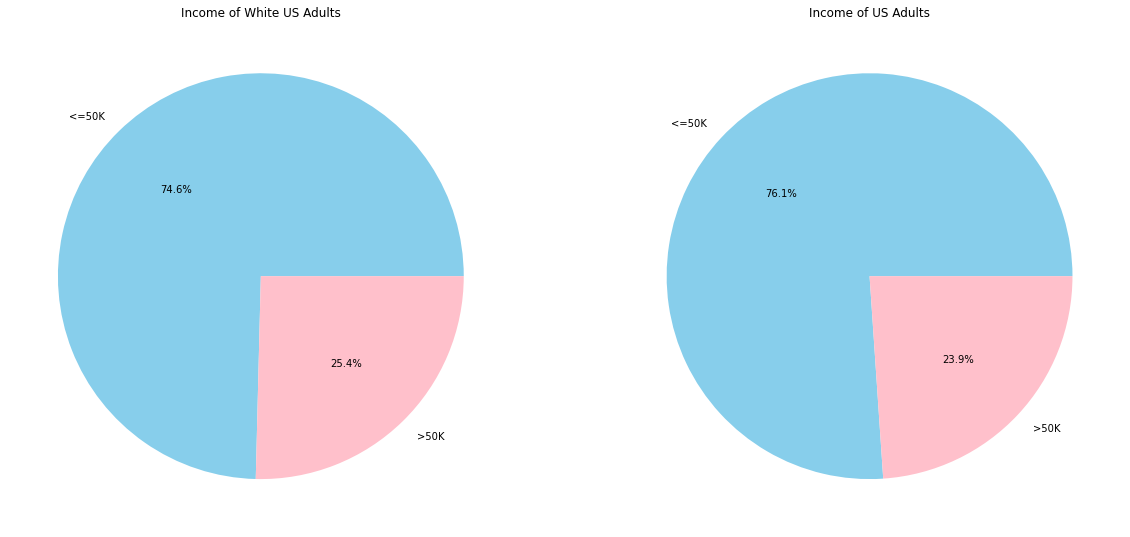

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
income_chart(data[data['race']=='White'], 'Income of White US Adults')
plt.subplot(1,2,2)
income_chart(data,'Income of US Adults')

Only marginally better! Being white nets you about 1.5 percentage points or about a 6 percent greater chance of making over 50K. Definitely not a huge increase but also not nothing. The majority of the people in this dataset are white however.

In [6]:
data.race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

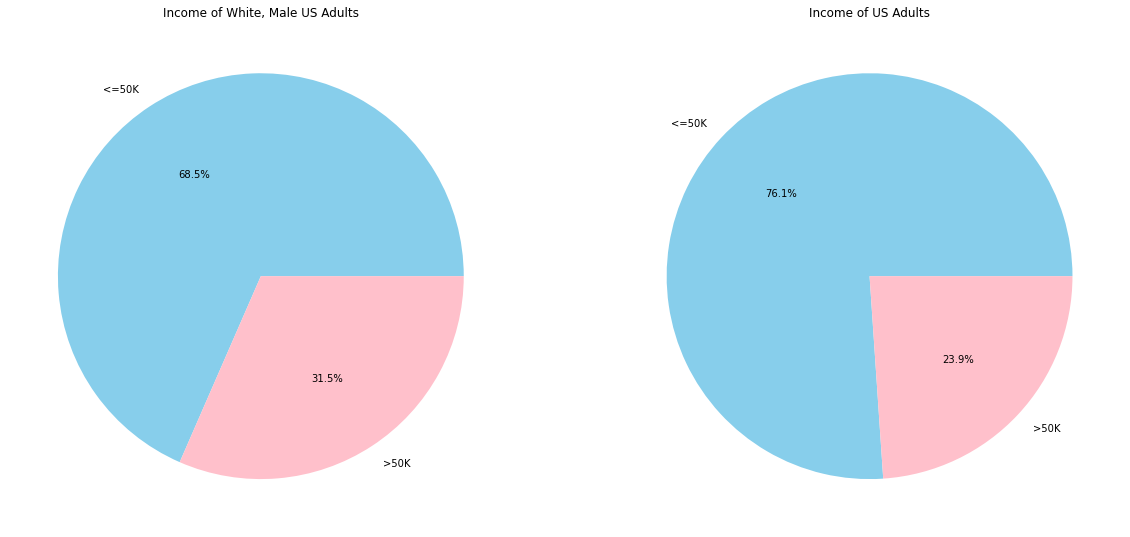

In [8]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
income_chart(data[(data['race']=='White')&(data['gender']=='Male')], 'Income of White, Male US Adults')
plt.subplot(1,2,2)
income_chart(data,'Income of US Adults')

Now there is a definite jump! White males have a roughly 32 percent higher chance of making 50k+ than the general population.

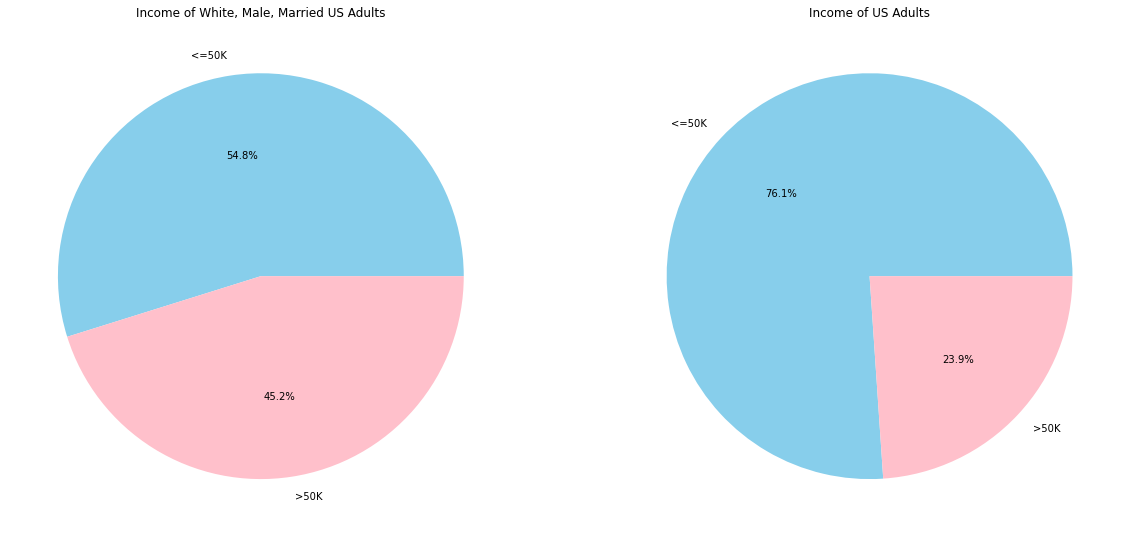

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
income_chart(data[(data['race']=='White')&(data['gender']=='Male')&
                  (data['marital-status'].isin(['Married-civ-spouse', 'Married-AF-spouse']))], 
             'Income of White, Male, Married US Adults')
plt.subplot(1,2,2)
income_chart(data,'Income of US Adults')

White, married males are about 88% more likely to make over 50K.

# Comparing Groups Against Each Other Instead of the Whole Population

While the increase in wealth for white, married males is fairly hefty against the 'general population', the 'general population' also includes white, married males.

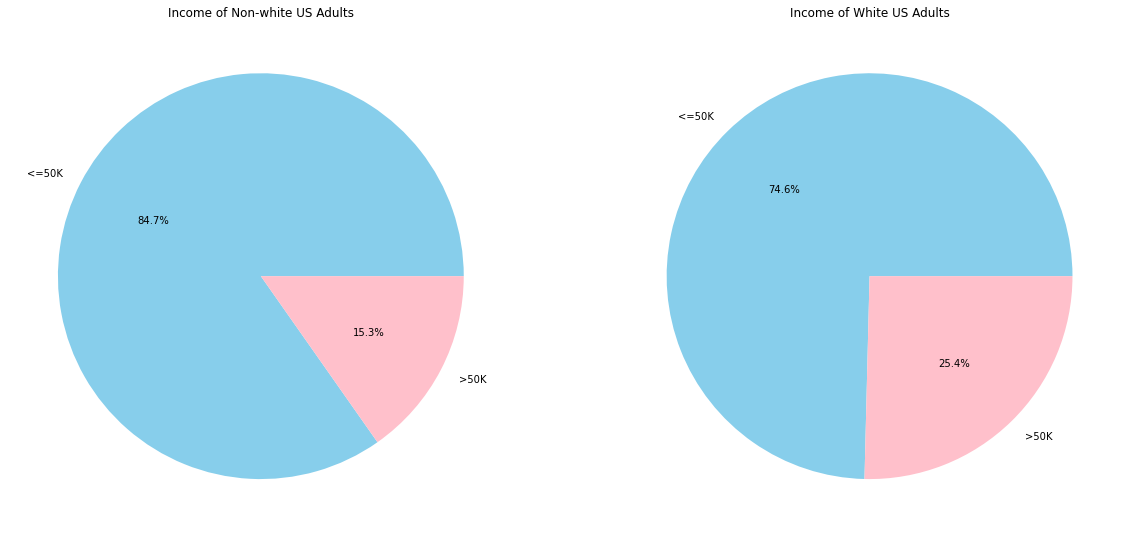

In [13]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
income_chart(data[data['race']!='White'], 'Income of Non-white US Adults')
plt.subplot(1,2,2)
income_chart(data[data['race']=='White'], 'Income of White US Adults')

White Americans are 67% more likely that non-white Americans to make over \$50k.

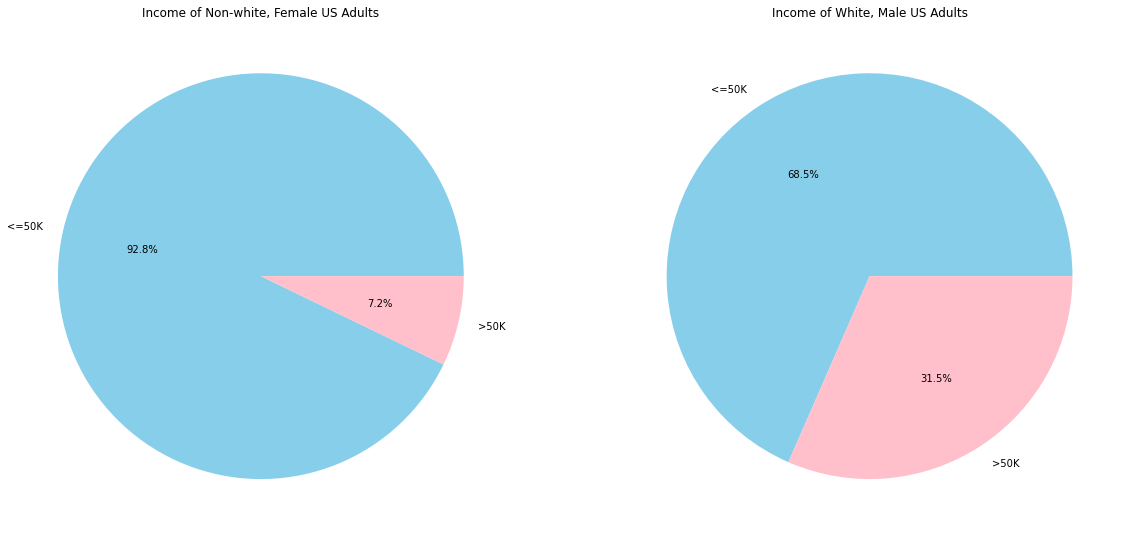

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
income_chart(data[(data['race']!='White')&(data['gender']!='Male')], 'Income of Non-white, Female US Adults')
plt.subplot(1,2,2)
income_chart(data[(data['race']=='White')&(data['gender']=='Male')], 'Income of White, Male US Adults')

White males are 348% more likely that non-white females to make over $50k.

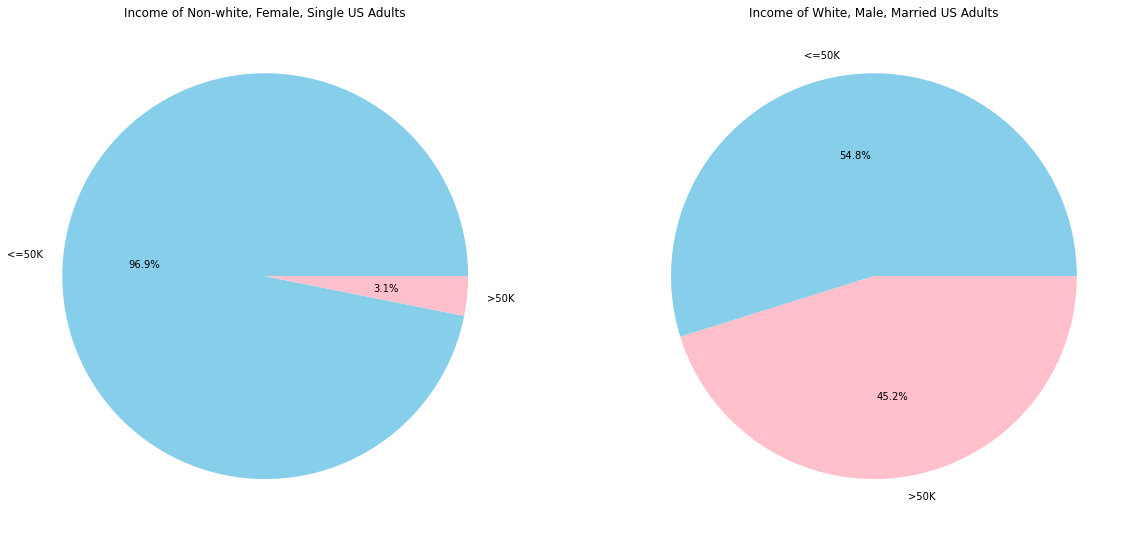

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
income_chart(data[(data['race']!='White')&(data['gender']!='Male')&
                  (~data['marital-status'].isin(['Married-civ-spouse', 'Married-AF-spouse']))], 
             'Income of Non-white, Female, Single US Adults')
plt.subplot(1,2,2)
income_chart(data[(data['race']=='White')&(data['gender']=='Male')&
                  (data['marital-status'].isin(['Married-civ-spouse', 'Married-AF-spouse']))], 
             'Income of White, Male, Married US Adults')

And, finally, white, married males are 1358% more likely that non-white, single females to make over $50k.

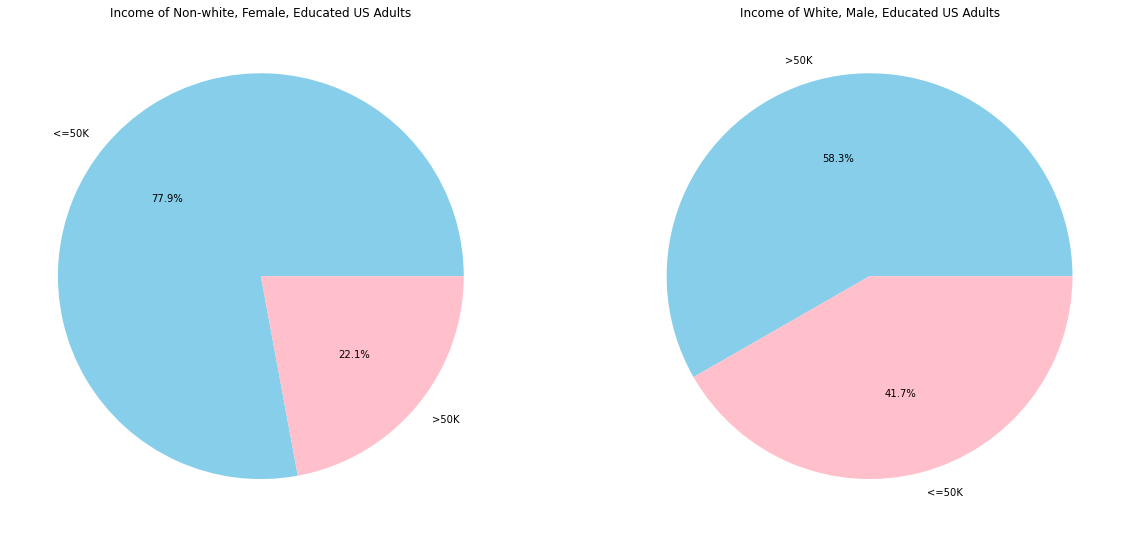

In [19]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
income_chart(data[(data['race']!='White')&(data['gender']!='Male')
                 &(data['educational-num']>=13)], 
             'Income of Non-white, Female, Educated US Adults')
plt.subplot(1,2,2)
income_chart(data[(data['race']=='White')&(data['gender']=='Male')&
                  (data['educational-num']>=13)], 
             'Income of White, Male, Educated US Adults')

Even when adjusted for education (only those who have at least a bachelor's degree), white males have a 162% greater chance of making over $50K.